In [29]:
import psycopg2
import csv

# Parámetros de conexión
host = "localhost"
port = "5342"
dbname = "myname_db"
user = "myname_user"
password = "password"

# Establecer conexión
conn = psycopg2.connect(
    host=host,
    port=port,
    dbname=dbname,
    user=user,
    password=password
)

# Crear un cursor
cur = conn.cursor()

# Abrir el archivo CSV
with open('C:\\Users\\Edward Morales\\Documents\\GitHub\\Tarea_1_Visualizacion\\Carnado.csv', 'r') as f: #Aqui tienes que poner el link de tu archivo
    reader = csv.reader(f)
    next(reader)  # Saltar la cabecera
    for row in reader:
        # Convertir 'null' a None
        row = [None if x == 'null' else x for x in row]
        cur.execute(
            "INSERT INTO cardano_prices (date, open, high, low, close, adj_close, volume) VALUES (%s, %s, %s, %s, %s, %s, %s)",
            row
        )

# Confirmar los cambios
conn.commit()

# Cerrar el cursor y la conexión
cur.close()
conn.close()


In [30]:
import pandas as pd
import plotly.graph_objects as go

# Conectar a la base de datos y obtener los datos
# Reemplaza con tu conexión a la base de datos
conn = psycopg2.connect(
    host=host,
    port=port,
    dbname=dbname,
    user=user,
    password=password
)
df = pd.read_sql("SELECT * FROM cardano_prices", conn)

# Crear el gráfico de candlestick
fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'])])

fig.update_layout(title='Gráfico de Candlestick de Cardano USD (ADA-USD)',
                  xaxis_title='Fecha',
                  yaxis_title='Precio')

fig.show()


C:\Users\Edward Morales\AppData\Local\Temp\ipykernel_28048\1585084140.py:13: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



En la serie de tiempo se ve como desde los años anteroires a 2018 el valor aproximado de la moneda carnado o ADA es aproximadamente cero pero en enero de este año hubo un pico al cual llegó el precio hasta aproximadamente 1.5 dólares, después el precio empezó a reducirse a lo largo de todo este año volviendo a cero y continuo asi hasta principios del año 2021 en el cual otra vez hubo un crecimiento rápido de la moneda llegando a un pico de 2.5 dólares, en julio del mismo año hubo otro pico en el cual llegó hasta 3.2 dólares aprox y cerró el año 2021 con 2.5 aproximadamente. El valor de esta criptomoneda muestra una naturaleza muy cambiante e impredecible, por lo que es muy dificil predecir su comportamiento, y como dato intersante su valor actual es de aproximadamente 0.3 dolares.

In [13]:
import pandas as pd
import psycopg2
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt


# Parámetros de conexión
host = "localhost"
port = "5342"
dbname = "myname_db"
user = "myname_user"
password = "password"

# Establecer conexión
conn = psycopg2.connect(
    host=host,
    port=port,
    dbname=dbname,
    user=user,
    password=password
)

# Consultar los datos
query = "SELECT * FROM cardano_prices"
df = pd.read_sql(query, conn)

# Cerrar la conexión
conn.close()

# Estadísticas Descriptivas
print(df.describe())





              open         high          low        close    adj_close  \
count  1471.000000  1471.000000  1471.000000  1471.000000  1471.000000   
mean      0.374234     0.393359     0.354385     0.375726     0.375726   
std       0.609602     0.639195     0.578952     0.611501     0.611501   
min       0.018414     0.021050     0.017354     0.018539     0.018539   
25%       0.047560     0.049503     0.046073     0.047592     0.047592   
50%       0.093398     0.096776     0.090105     0.093434     0.093434   
75%       0.301339     0.318211     0.283567     0.301889     0.301889   
max       2.966390     3.099186     2.907606     2.968239     2.968239   

             volume  
count  1.471000e+03  
mean   1.090947e+09  
std    2.258370e+09  
min    1.739460e+06  
25%    5.366896e+07  
50%    1.359691e+08  
75%    6.999972e+08  
max    1.914198e+10  


C:\Users\Edward Morales\AppData\Local\Temp\ipykernel_33760\1063040576.py:26: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



Los datos de la variable Open se puede notar una asimetría hacia la derecha dado que la mediana es de 0.09 y la media es de 0.3 es decir que la mayoría de datos se encuentran entre el centro y la izquierda (entre 0 y 1 dolar), podemos ver un comportamiento muy parecido entre todas las demás variables ya que tanto para high, como low, close y adj_close se nota como tienen una alta desviación estándar unos valores en 3 y aproximadamente cero, una asimetría hacia la derecha ya que todos tienen una media de aproximadamente 0.6 y una mediana de 0.9.
Para volume siendo la cantidad de activos que han cambiado de mano entre compradores y vendedores,son un poco más centrados no tienen tanta asimetría y son valores bastante grandes

C:\Users\Edward Morales\AppData\Local\Temp\ipykernel_33760\301618473.py:19: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



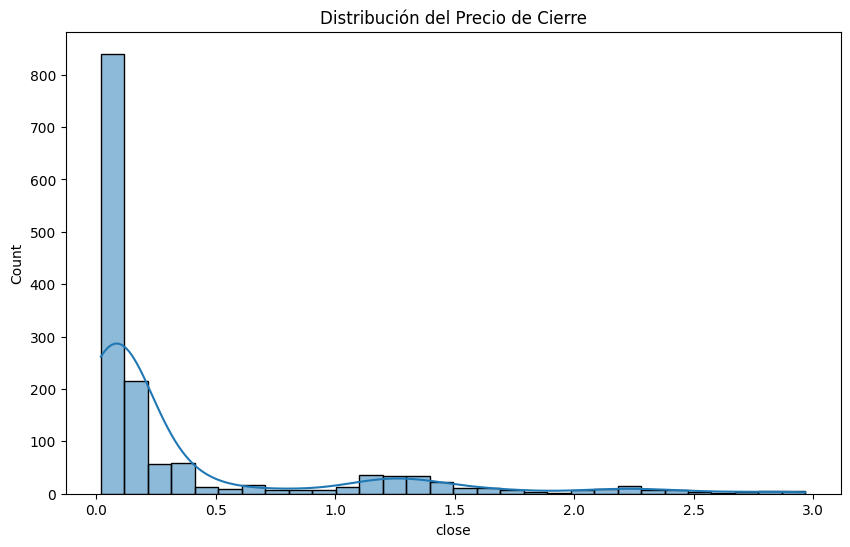

In [19]:
# Parámetros de conexión
host = "localhost"
port = "5342"
dbname = "myname_db"
user = "myname_user"
password = "password"

# Establecer conexión
conn = psycopg2.connect(
    host=host,
    port=port,
    dbname=dbname,
    user=user,
    password=password
)

# Consultar los datos
query = "SELECT * FROM cardano_prices"
df = pd.read_sql(query, conn)

# Cerrar la conexión
conn.close()

# Distribución de los Datos
plt.figure(figsize=(10, 6))
sns.histplot(df['close'], kde=True, bins=30)
plt.title('Distribución del Precio de Cierre')
plt.show()





en estos gráficos podemos ver de cómo se encuentra distribuida la variable close, más de 800 observaciones tienen valores entre 0 y 0.1 y muy pocas observaciones llegan a 3 eso se nota muy claramente con el gráfico de velas ya qu durante mucho tiempo el valor de esta moneda es de entre 0 y 0.5 y muy pocas veces llega a superar el valor de 1

C:\Users\Edward Morales\AppData\Local\Temp\ipykernel_33760\8689998.py:19: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



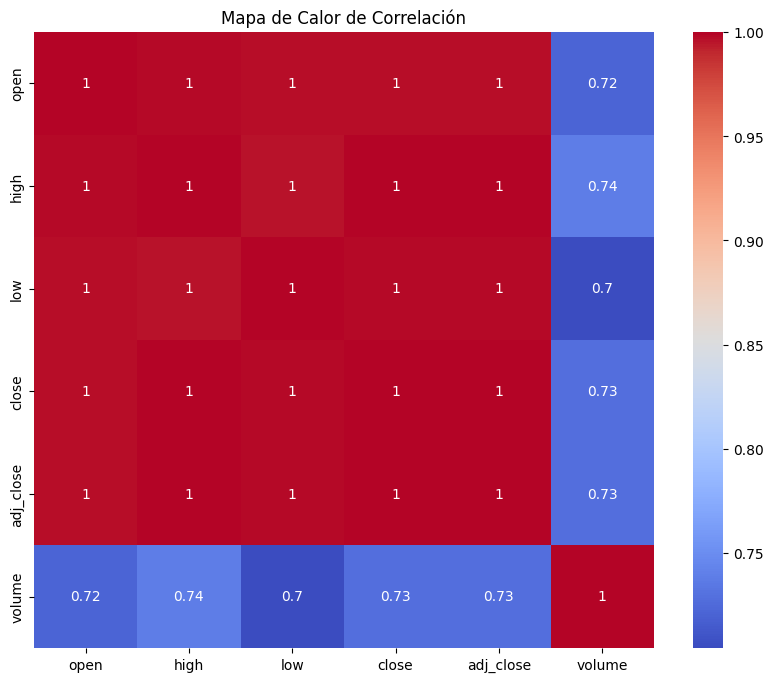

In [18]:

# Parámetros de conexión
host = "localhost"
port = "5342"
dbname = "myname_db"
user = "myname_user"
password = "password"

# Establecer conexión
conn = psycopg2.connect(
    host=host,
    port=port,
    dbname=dbname,
    user=user,
    password=password
)

# Consultar los datos
query = "SELECT * FROM cardano_prices"
df = pd.read_sql(query, conn)

# Cerrar la conexión
conn.close()   
# Correlaciones (excluyendo la columna 'date')
corr = df.drop(columns=['date']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()


En este grafico de correlación podemos ver cómo hay mucha correlación entre todas las variables ya que claramente el momento de una variable explicar el comportamiento de muchas otras ya que si la moneda sube pues tanto su valor mínimo, su valor máximo, su valor de cierra, su valor ajustado suben. Una parte en la cual se ve claramente porque ese gráfico de correlacion es así, es durante todos esos años en los cuales el valor de apertura era muy cercano al valor de cierre ya que se encontraba entre 0 y 0.1 entonces como no había una variación y todas las variables tienen valores muy cercanos la correlacion es perfeca.